# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#declare and intialize few empty arrays needed to store data
temp =[]
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
min_temp =[]
date = []
lat = []
long = []
country = []
city = []

#weather api url 
open_weather_url = "http://api.openweathermap.org/data/2.5/weather?"  
#city query url
city_query_url = f"{open_weather_url}q="
units = "imperial"
app_key_url = f"&units={units}&appid={weather_api_key}"

# run a for loop for all the cities by passing them to the query parameter
for i in range(len(cities)):
    try:
        # get all thedata needed into data structures or arrays
        response = requests.get(city_query_url + cities[i] + app_key_url)
        response_json = response.json()
        city.append(response_json['name'])
        temp.append(response_json['main']['temp'])
        max_temp.append(response_json['main']['temp_max'])
        min_temp.append(response_json['main']['temp_min'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        long.append(response_json['coord']['lon'])
        country.append(response_json['sys']['country'])
        
        #log each city
        print(f'City {i}: {cities[i]}')
    
    #if city not found --> handle error scenario
    except KeyError:
         print('No City Found!')
            

City 0: bluff
No City Found!
No City Found!
No City Found!
City 4: sao filipe
City 5: longyearbyen
City 6: pauini
City 7: nsanje
City 8: punta arenas
City 9: tuktoyaktuk
City 10: albany
City 11: richards bay
City 12: faanui
City 13: saldanha
City 14: thyboron
City 15: ushuaia
City 16: lasa
No City Found!
No City Found!
City 19: hofn
City 20: cape town
City 21: naze
City 22: pijino
City 23: rikitea
City 24: bethel
No City Found!
No City Found!
No City Found!
No City Found!
City 29: busselton
City 30: manokwari
City 31: ettaiyapuram
City 32: puerto ayora
City 33: arraial do cabo
City 34: maridi
City 35: port lincoln
City 36: ilulissat
City 37: vaini
City 38: leningradskiy
City 39: okhotsk
City 40: kodiak
City 41: hobyo
City 42: mataura
City 43: jamestown
City 44: hermanus
No City Found!
City 46: charters towers
City 47: ancud
City 48: hilo
City 49: la grande
City 50: emerald
City 51: cherskiy
City 52: bambous virieux
City 53: provideniya
City 54: san patricio
City 55: bengkulu
City 56: y

City 439: castro
City 440: prieska
City 441: dicabisagan
City 442: natal
No City Found!
No City Found!
City 445: bud
City 446: biloela
City 447: bintulu
No City Found!
City 449: torrox
City 450: luderitz
City 451: erzin
City 452: elko
City 453: alofi
City 454: camacari
City 455: riyadh
City 456: cabedelo
City 457: tigil
City 458: arshan
City 459: margate
City 460: erenhot
City 461: ilhabela
City 462: praia da vitoria
City 463: hinton
City 464: tetouan
City 465: toora-khem
City 466: haines junction
City 467: neuquen
City 468: saryozek
City 469: labuan
City 470: asau
City 471: antropovo
City 472: grivita
City 473: comodoro rivadavia
No City Found!
City 475: batagay-alyta
City 476: kyra
City 477: la ronge
City 478: farafangana
City 479: sur
City 480: mapiripan
City 481: dwarka
City 482: valdemarpils
City 483: petropavlovka
City 484: marsabit
City 485: carauari
City 486: elmadag
City 487: hovd
City 488: san ramon de la nueva oran
City 489: villa bruzual
City 490: iquique
City 491: bambangl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df = pd.DataFrame({"City":city,"Lat":lat,"Long":long,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
#display the dataframe
display(cities_df.head())
#export the prev city data into a csv
cities_df.to_csv('../output_data/cities.csv',index=False, header=True)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.01,84,60,3.65,NZ,1620365909
1,São Filipe,14.8961,-24.4956,71.73,79,39,6.69,CV,1620365909
2,Longyearbyen,78.2186,15.6401,19.40,63,20,16.11,SJ,1620365910
3,Pauini,-7.7136,-66.9764,71.01,99,100,4.88,BR,1620365910
4,Nsanje,-16.9200,35.2620,69.73,66,5,2.44,MW,1620365910


In [10]:
#use describe on the cities dataframe to get the stats 
cities_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,5.470000e+02
mean,20.541129,12.742063,62.221005,70.25777,55.795247,7.222249,1.620366e+09
std,33.341409,91.211301,18.441088,22.64306,38.708951,4.932916,8.670264e+01
min,-54.800000,-175.200000,15.800000,3.00000,0.000000,0.310000,1.620365e+09
25%,-6.567850,-66.638950,47.910000,58.00000,17.000000,3.440000,1.620366e+09
50%,25.021300,17.117800,64.400000,76.00000,69.000000,5.750000,1.620366e+09
75%,49.326700,86.669550,76.245000,88.00000,92.500000,10.045000,1.620366e+09
max,78.218600,179.316700,99.370000,100.00000,100.000000,32.260000,1.620366e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#if there are cities > 100% humidity
#remove them else skip this step

cities_df_outliers = cities_df[cities_df['Humidity'] >100]
if len(cities_df_outliers) != 0:
    cities_df.drop(cities_df.index[['Humidity'] >100], inplace = True)
len(cities_df_outliers)   

0

In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers_index = cities_df_outliers.index
len(humidity_outliers_index)

0

In [13]:
clean_city_data = cities_df.drop(humidity_outliers_index, inplace = False)
clean_city_data.drop_duplicates(inplace=True)
clean_city_data.head()            

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.01,84,60,3.65,NZ,1620365909
1,São Filipe,14.8961,-24.4956,71.73,79,39,6.69,CV,1620365909
2,Longyearbyen,78.2186,15.6401,19.40,63,20,16.11,SJ,1620365910
3,Pauini,-7.7136,-66.9764,71.01,99,100,4.88,BR,1620365910
4,Nsanje,-16.9200,35.2620,69.73,66,5,2.44,MW,1620365910


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

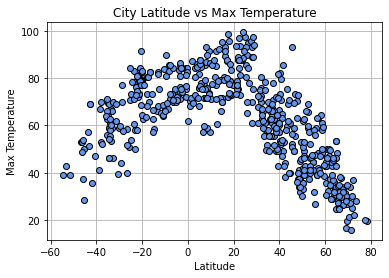

In [14]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, max_temp,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_MaxTemperature.png')
plt.show()


The above scatterplot depicts the relationship between latitude and max temperature
Noticeable point is that the max temperatures are recorded around eqautor region and there is no linear relation among both variables.
Although we could say that temperatures might be low in northern hemisphere,there is no solid relation or data to prove it

## Latitude vs. Humidity Plot

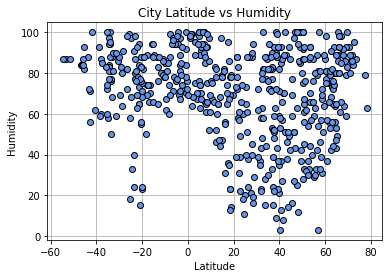

In [15]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat,humidity,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
plt.savefig('../Images/CityLatitude_vs_Humidity.png')
plt.show()

In [ ]:
The above scatterplot depicts the relationship between latitude and humidity
There is no linear relationsip among the variables. Humidity varies with latitude 

## Latitude vs. Cloudiness Plot

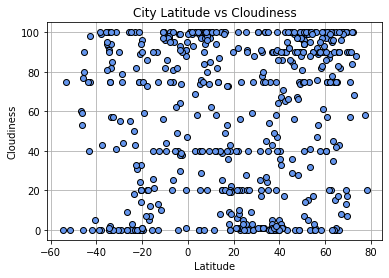

In [16]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, cloudiness,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_Cloudiness.png')
plt.show()

In [ ]:
The above scatterplot depicts the relationship between latitude and cloudiness
There is no linear relationsip among the variables. Cloudiness varies with latitude
Also data distribution is multimodal as we can clearly see there are multiple cloudiness values for same latitude

## Latitude vs. Wind Speed Plot

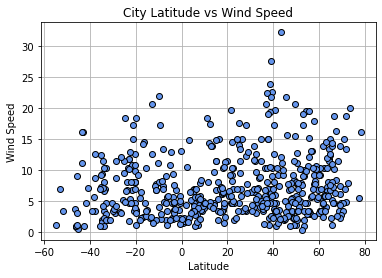

In [17]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#as there is no change in the cities_df due to humidity using pre-calculated individual arrays
plt.plot(lat, wind_speed,marker="o",markerfacecolor="cornflowerblue",color='black',linestyle='None')
#save the plot as image
#lesson learnt: When you close the image displayed by plt.show(), the image is closed and freed from memory.You should call savefig and savetxt before calling show.
plt.savefig('../Images/CityLatitude_vs_WindSpeed.png')
plt.show()

In [ ]:
The above scatterplot depicts the relationship between latitude and windspeed
There is no clear linear relationsip among the variables. wind speeds varies with latitude

## Linear Regression

In [18]:
#Equator or latitude 0 divides northern and southern hemisphere
#Get nothern hemisphere data
north_hemisphere_df = clean_city_data[clean_city_data['Lat'] > 0]
#Get southern hemisphere data
south_hemisphere_df = clean_city_data[clean_city_data['Lat'] < 0]
display(north_hemisphere_df)
display(south_hemisphere_df)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,São Filipe,14.8961,-24.4956,71.73,79,39,6.69,CV,1620365909
2,Longyearbyen,78.2186,15.6401,19.40,63,20,16.11,SJ,1620365910
6,Tuktoyaktuk,69.4541,-133.0374,26.60,93,90,13.80,CA,1620365911
7,Albany,42.6001,-73.9662,44.01,51,100,3.53,US,1620365672
11,Thyborøn,56.6985,8.2124,42.01,3,89,5.57,DK,1620365913
...,...,...,...,...,...,...,...,...,...
539,Solnechnyy,50.7214,136.6319,40.96,67,94,7.90,RU,1620366129
542,Visby,57.6409,18.2960,39.99,81,90,10.36,SE,1620366130
544,Nongpoh,25.9000,91.8833,69.80,88,90,5.75,IN,1620366130
545,Berbérati,4.2612,15.7922,71.60,94,100,3.06,CF,1620366131


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.01,84,60,3.65,NZ,1620365909
3,Pauini,-7.7136,-66.9764,71.01,99,100,4.88,BR,1620365910
4,Nsanje,-16.9200,35.2620,69.73,66,5,2.44,MW,1620365910
5,Punta Arenas,-53.1500,-70.9167,42.80,87,75,6.91,CL,1620365832
8,Richards Bay,-28.7830,32.0377,69.80,80,79,8.66,ZA,1620365912
...,...,...,...,...,...,...,...,...,...
530,Shakawe,-18.3667,21.8500,63.43,50,7,5.48,BW,1620366126
535,Charlestown,-32.9500,151.6667,70.00,90,57,1.99,AU,1620366127
540,Tshikapa,-6.4167,20.8000,70.52,96,100,3.40,CD,1620366129
541,Aitape,-3.1374,142.3475,84.42,79,39,7.58,PG,1620366129


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8239710532635248


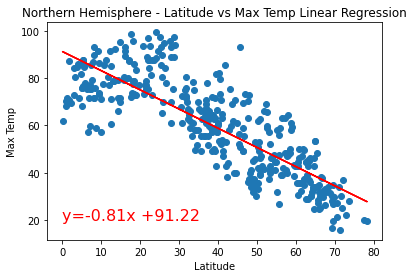

In [20]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(0,20),fontsize=16,color='red')

plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.title('Northern Hemisphere - Latitude vs Max Temp Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_MaxTemp_vs_Latitude.png')
plt.show()


In [ ]:
The above plot depicts the relationship between Northern Hemisphere's latitude and max Temperarure 

The linear regression shows that as we keep going north, the max temperatures decrease.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6832002590814567


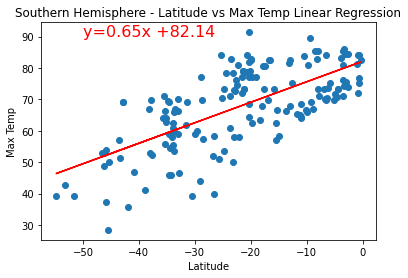

In [22]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,90),fontsize=16,color='red')

plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.title('Southern Hemisphere - Latitude vs Max Temp Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_MaxTemp_vs_Latitude.png')
plt.show()


In [ ]:
The above plot depicts the relationship between Southern Hemisphere's latitude and max Temperarure 

The linear regression shows that as we keep going south, the max temperatures increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.021079160387096223


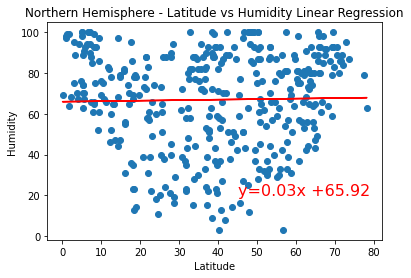

In [23]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(45,20),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title('Northern Hemisphere - Latitude vs Humidity Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_Humidity.png')
plt.show()


In [ ]:
The above plot depicts the relationship between Northern Hemisphere's latitude and max Temperarure 

The linear regression shows that as we keep going south, the max temperatures increase.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.024188660410909814


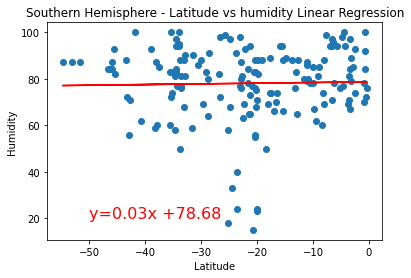

In [24]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,20),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.title('Southern Hemisphere - Latitude vs humidity Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_Humidity_vs_Latitude.png')
plt.show()


In [ ]:
The above plot depicts the relationship between Southern Hemisphere's latitude and max Temperarure 

The linear regression shows that as we keep going south, the max temperatures increase.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09138663607530505


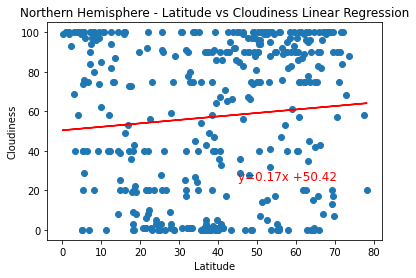

In [25]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(45,25),fontsize=12,color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title('Northern Hemisphere - Latitude vs Cloudiness Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08176797619344049


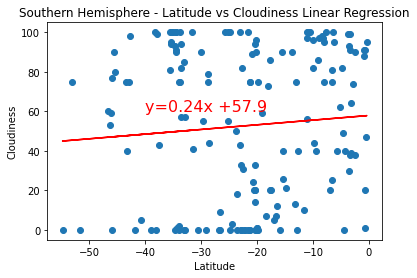

In [26]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-40,60),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.title('Southern Hemisphere - Latitude vs Cloudiness Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_Cloudiness_vs_Latitude.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1555326155578249


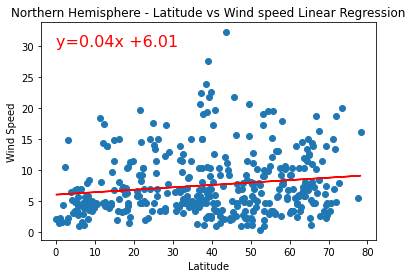

In [28]:
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(0,30),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title('Northern Hemisphere - Latitude vs Wind speed Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_North_Lat_vs_WindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04802815053504363


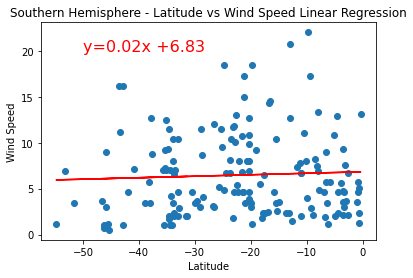

In [30]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_equation = "y=" +str(round(slope,2))+ "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(-50,20),fontsize=16,color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title('Southern Hemisphere - Latitude vs Wind Speed Linear Regression')
print(f'The r-value is: {rvalue}')
plt.savefig('../Images/Regression_South_WindSpeed_vs_Latitude.png')
plt.show()